In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager
from mplsoccer import Sbopen

pd.set_option('display.max_columns', 500)

In [4]:
parser = Sbopen()

In [6]:
df_match = parser.match(competition_id=43, season_id=106)
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         64 non-null     int64         
 1   match_date                       64 non-null     datetime64[ns]
 2   kick_off                         64 non-null     datetime64[ns]
 3   home_score                       64 non-null     int64         
 4   away_score                       64 non-null     int64         
 5   match_status                     64 non-null     object        
 6   match_status_360                 64 non-null     object        
 7   last_updated                     64 non-null     datetime64[ns]
 8   last_updated_360                 64 non-null     datetime64[ns]
 9   match_week                       64 non-null     int64         
 10  competition_id                   64 non-null     int64         


In [8]:
df_match.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3857256,2022-12-02,2022-12-02 21:00:00,2,3,available,available,2023-02-17 23:45:15.306706,2023-04-26 23:49:58.956186,3,43,International,FIFA World Cup,106,2022,786,Serbia,male,G,203,Serbia,5908,Dragan Stojković,Dragan Stojković,1965-03-03,203,Serbia,773,Switzerland,male,G,221,Switzerland,2832,Murat Yakin,Murat Yakin,1974-09-15,221,Switzerland,1.1.0,2,2,10,Group Stage,1001115,Stadium 974,185,Qatar,1121.0,Fernando Andrés Rapallini,11.0,Argentina
1,3869151,2022-12-03,2022-12-03 21:00:00,2,1,available,available,2023-07-30 07:46:05.382784,2023-07-30 07:48:51.865595,4,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,792,Australia,male,None,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,1.1.0,2,2,33,Round of 16,1000793,Ahmad bin Ali Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
2,3857257,2022-11-30,2022-11-30 17:00:00,1,0,available,available,2023-04-28 17:13:10.958725,2023-06-20 11:04:37.638969,3,43,International,FIFA World Cup,106,2022,792,Australia,male,D,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,776,Denmark,male,D,61,Denmark,255,Kasper Hjulmand,Kasper Hjulmand,1972-04-09,61,Denmark,1.1.0,2,2,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,2311.0,Mustapha Ghorbal,4.0,Algeria
3,3857258,2022-11-24,2022-11-24 21:00:00,2,0,available,available,2023-06-24 17:17:27.911026,2023-07-11 14:56:31.096588,1,43,International,FIFA World Cup,106,2022,781,Brazil,male,G,31,Brazil,4704,Telê Santana da Silva,Telê Santana,1931-07-26,31,Brazil,786,Serbia,male,G,203,Serbia,5908,Dragan Stojković,Dragan Stojković,1965-03-03,203,Serbia,1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,741.0,Alireza Faghani,107.0,"Iran, Islamic Republic of"
4,3857288,2022-11-26,2022-11-26 12:00:00,0,1,available,available,2023-02-28 21:25:20.888552,2023-04-27 00:30:07.835815,2,43,International,FIFA World Cup,106,2022,777,Tunisia,male,D,232,Tunisia,1001303,Jalel Kadri,Jalel Kadri,NaT,232,Tunisia,792,Australia,male,D,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,1.1.0,2,2,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,225.0,Daniel Siebert,85.0,Germany


In [10]:
# iterate through all matches to get the events data
df_matches = {}
for i, id in enumerate(df_match['match_id']):
  df_matches[id] = {}
  df_matches[id]['event'], df_matches[id]['related'], df_matches[id]['freeze'], df_matches[id]['tactic'] = parser.event(id)

In [12]:
# example events data, filtered to shots only
df_matches[3857288]['event'][df_matches[3857288]['event']['type_name'] == 'Shot'].head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,under_pressure,outcome_id,outcome_name,counterpress,aerial_won,ball_recovery_recovery_failure,pass_switch,out,dribble_nutmeg,pass_cross,shot_statsbomb_xg,shot_first_time,technique_id,technique_name,goalkeeper_position_id,goalkeeper_position_name,off_camera,pass_cut_back,injury_stoppage_in_chain,pass_deflected,block_deflection,pass_assisted_shot_id,pass_shot_assist,end_z,shot_key_pass_id,foul_committed_offensive,foul_committed_card_id,foul_committed_card_name,foul_won_defensive,foul_committed_advantage,foul_won_advantage,substitution_replacement_id,substitution_replacement_name,dribble_overrun
225,f7f89232-029c-46d3-9b33-6171761da364,226,1,00:05:35,5,35,15,0.037121,3857288,16,Shot,792,Australia,3,From Free Kick,792,Australia,None,28370.0,Fran Karačić,2.0,Right Back,NaN,NaN,NaN,NaN,NaN,NaN,91.8,41.1,40.0,Right Foot,87.0,Open Play,90.9,41.2,1.0,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015131,True,95.0,Volley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815,079ee5e7-8f88-419b-874f-08f5f6d45c07,816,1,00:20:20,20,20,43,1.158633,3857288,16,Shot,777,Tunisia,4,From Throw In,777,Tunisia,None,9236.0,Mohamed Dräger,7.0,Right Wing Back,NaN,NaN,NaN,NaN,NaN,NaN,120.0,40.4,40.0,Right Foot,87.0,Open Play,92.0,42.5,NaN,98.0,Off T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029704,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9,7b76477e-90f5-4ef8-a2e9-538a3500400b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,3af59ce2-13dd-4ef4-b999-35444cb60d7c,856,1,00:22:50,22,50,47,1.104271,3857288,16,Shot,792,Australia,4,From Throw In,792,Australia,None,33492.0,Mitchell Thomas Duke,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.6,37.0,Head,87.0,Open Play,110.1,32.5,NaN,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044595,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878,787614d6-21dd-40c6-9fd7-be27b59bdc71,879,1,00:26:06,26,6,50,0.095529,3857288,16,Shot,792,Australia,3,From Free Kick,792,Australia,None,33492.0,Mitchell Thomas Duke,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,111.4,34.8,37.0,Head,87.0,Open Play,110.7,34.3,NaN,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039484,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,959fe1f8-14c4-4f1f-be78-7642c520ee21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,0053d038-426b-4756-b8e3-67355127786c,1073,1,00:33:45,33,45,64,0.629841,3857288,16,Shot,792,Australia,2,From Corner,792,Australia,None,5490.0,Jackson Irvine,9.0,Right Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,120.0,47.2,40.0,Right Foot,87.0,Open Play,114.3,48.2,NaN,98.0,Off T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075431,True,89.0,Backheel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,e1ac1a22-6c63-4700-a85c-3b8328d9de74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_matches[3857288]['event'].shape

(3360, 70)

In [16]:
# types of shot play
df_matches[3869321]['event'][df_matches[3869321]['event']['type_name'] == 'Shot']['sub_type_name'].unique()

array(['Open Play', 'Free Kick', 'Penalty'], dtype=object)

In [18]:
# we'll take the location, outcome, and also the xG by Statsbomb to compare it to our model later
df_shot = pd.DataFrame(columns=['x', 'y', 'outcome_name', 'shot_statsbomb_xg'])

for id in df_match['match_id']:
  # we take the period <= 4 because statsbomb also record penalty shots in the penalty shoot-out stage, we won't be using those shots
  # for our first model, we'll only take open play shots because penalty shots tend to have way higher goal probability
  # we'll use the other shots scenario in our next model
  mask_shot = (df_matches[id]['event'].type_name == 'Shot') & (df_matches[id]['event'].period	<= 4) & (df_matches[id]['event'].sub_type_name	== 'Open Play')
  shots_temp = df_matches[id]['event'].loc[mask_shot, ['x', 'y', 'outcome_name', 'shot_statsbomb_xg']]
  df_shot = pd.concat([df_shot, shots_temp]).reset_index(drop=True)

In [20]:
df_shot.head()

,x,y,outcome_name,shot_statsbomb_xg
0,96.0,38.8,Blocked,0.036566
1,113.1,40.7,Saved,0.353289
2,103.8,41.9,Saved,0.069527
3,112.2,36.8,Off T,0.081609
4,97.8,51.5,Post,0.030002


In [22]:
len(df_shot)

1382

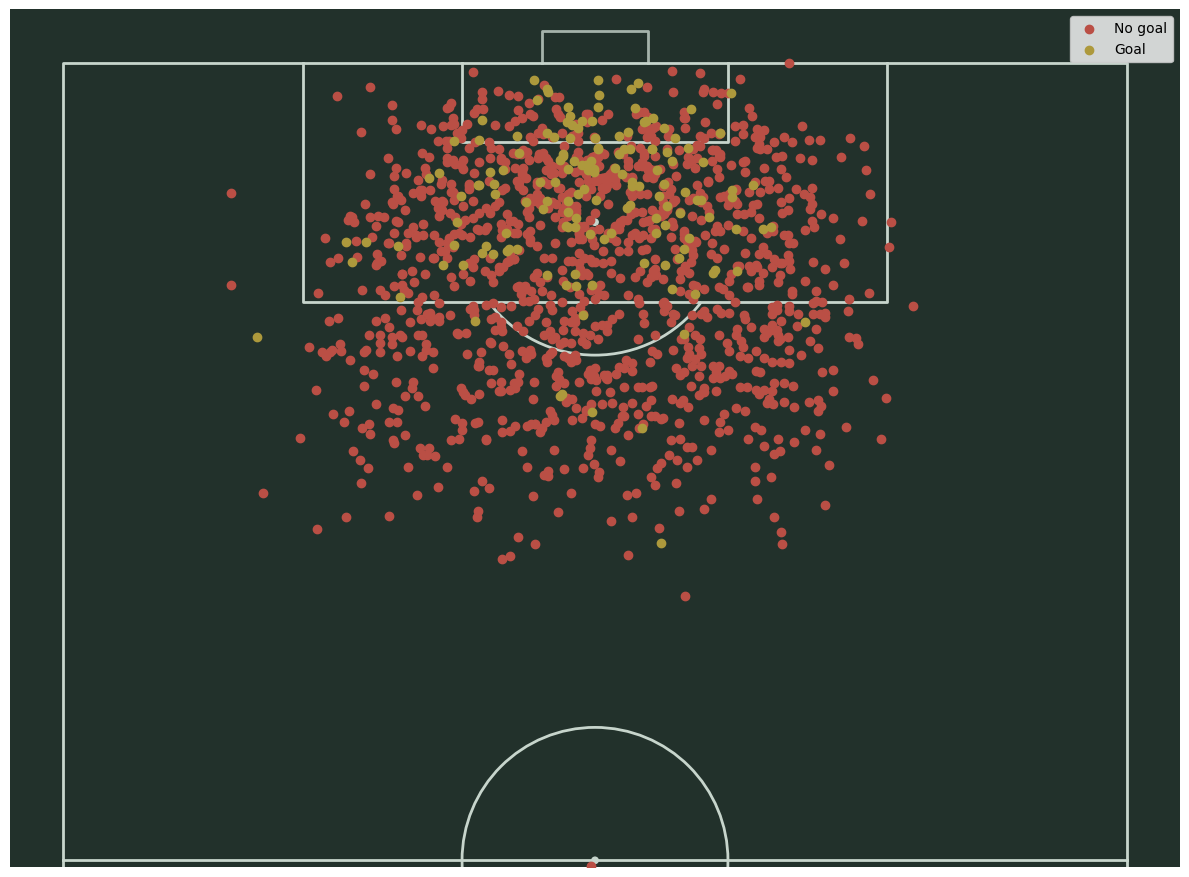

In [24]:
# visualizing shots

# filter goals / non-shot goals
df_goals = df_shot[df_shot.outcome_name == 'Goal'].copy()
df_non_goal_shots = df_shot[df_shot.outcome_name != 'Goal'].copy()

# setup the pitch
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8, pitch_color='#22312b', line_color='#c7d5cc')  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))

sc1 = pitch.scatter(df_non_goal_shots.x, df_non_goal_shots.y,
                    c='#ba4f45',
                    marker='o',
                    ax=ax, label="No goal")

sc2 = pitch.scatter(df_goals.x, df_goals.y,
                    c='#ad993c',
                    marker='o',
                    ax=ax, label="Goal")

plt.legend(loc='best')
plt.show()

In [26]:
import math

def calculate_angle(x, y):
  # 44 and 36 is the location of each goal post
  g0 = [120, 44]
  p = [x, y]
  g1 = [120, 36]

  v0 = np.array(g0) - np.array(p)
  v1 = np.array(g1) - np.array(p)

  angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
  return(abs(np.degrees(angle)))

def calculate_distance(x, y):
  x_dist = 120-x
  y_dist = 0
  if (y<36):
    y_dist = 36-y
  elif (y>44):
    y_dist = y-44
  return math.sqrt(x_dist**2 + y_dist**2)

In [28]:
df_shot['angle'] = df_shot.apply(lambda row:calculate_angle(row['x'], row['y']), axis=1)
df_shot['distance'] = df_shot.apply(lambda row:calculate_distance(row['x'], row['y']), axis=1)

In [30]:
# we'll create new column to define goal or not
df_shot['goal'] = df_shot.apply(lambda row:1 if row['outcome_name']=='Goal' else 0, axis=1)

In [32]:
df_shot.head()

,x,y,outcome_name,shot_statsbomb_xg,angle,distance,goal
0,96.0,38.8,Blocked,0.036566,18.879548,24.00000,0
1,113.1,40.7,Saved,0.353289,59.821068,6.90000,0
2,103.8,41.9,Saved,0.069527,27.397542,16.20000,0
3,112.2,36.8,Off T,0.081609,48.565404,7.80000,0
4,97.8,51.5,Post,0.030002,16.255762,23.43267,0


In [90]:
df_goals_only = df_shot[df_shot['goal'] == 1]

In [92]:
df_goals_only = df_goals_only.reset_index()  # make sure indexes pair with number of rows

for index, row in df_goals_only.iterrows():
    a = 0.001
    b = 0.001
    xg = 1 / (1 + math.e ** -(a * row['distance'] + b * row['angle']))
    print(f"Statsbomb xG: {row['shot_statsbomb_xg']}    | my xG: {xg}")

Statsbomb xG: 0.06969889    | my xG: 0.5089321501074456
Statsbomb xG: 0.06371751    | my xG: 0.5122485360447105
Statsbomb xG: 0.15928414    | my xG: 0.5097427696276119
Statsbomb xG: 0.72697556    | my xG: 0.5166104323071714
Statsbomb xG: 0.15381548    | my xG: 0.511809936921593
Statsbomb xG: 0.06663833    | my xG: 0.5096344153715056
Statsbomb xG: 0.28060678    | my xG: 0.5085824352576255
Statsbomb xG: 0.11353828    | my xG: 0.5096690080713034
Statsbomb xG: 0.568145    | my xG: 0.5184471678984026
Statsbomb xG: 0.07569885    | my xG: 0.5118294330781222
Statsbomb xG: 0.04459479    | my xG: 0.5100751398727214
Statsbomb xG: 0.5894187    | my xG: 0.5165597851566148
Statsbomb xG: 0.23427999    | my xG: 0.5117535210095285
Statsbomb xG: 0.43442267    | my xG: 0.5124150306685407
Statsbomb xG: 0.047416847    | my xG: 0.5105450010518022
Statsbomb xG: 0.21959315    | my xG: 0.5150457730988462
Statsbomb xG: 0.20030825    | my xG: 0.5160257868371023
Statsbomb xG: 0.30340916    | my xG: 0.509767307765